Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


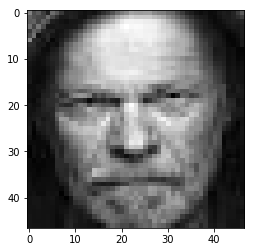

In [2]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

#Load haar cascade xml
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Emotions/haarcascade_frontalface_default.xml')

#Get directory strings
DATADIR = "/content/drive/My Drive/Emotions/TrainingData"
DATADIRHAAR = "/content/drive/My Drive/Emotions/Cascaded"
DATADIRRAW = "/content/drive/My Drive/Emotions/TrainingDataRaw"
#Category of emotions
CATEGORIES = ["anger","disgust","fear","joy","sadness", "surprise"]

#Show first image in training set
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

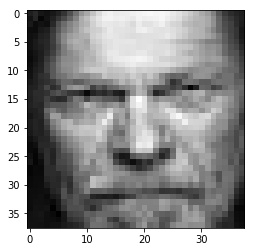

In [3]:
#Use haar cascade to detect face in image
faces = face_cascade.detectMultiScale(img_array)

#Extract face from image
for (x,y,w,h) in faces:
      img_array = img_array[y:y+h, x:x+w]
    
#Display Face
plt.imshow(img_array, cmap="gray")
plt.show()


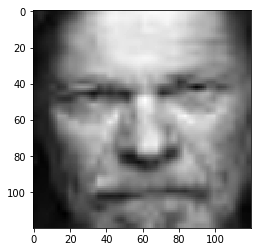

In [4]:
#Define normalisation sise
IMGSIZE = 120

#Resize image to 120 x 120
resized_array = cv2.resize(img_array, (IMGSIZE, IMGSIZE))

#Display Resized Image
plt.imshow(resized_array, cmap="gray")
plt.show()

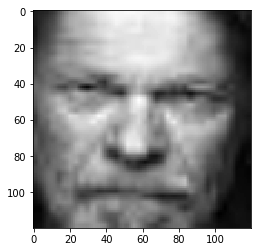

In [5]:
#Mirror Function
def mirror(img):
  mirrored_img = np.fliplr(img)
  return mirrored_img

#Mirror image
mirrored_img = mirror(resized_array)

#Display mirrored image
plt.imshow(mirrored_img, cmap="gray")
plt.show()

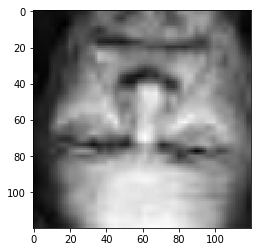

In [6]:
#Flip Function
def flip(img):
  flipped_img = np.flipud(img)
  return flipped_img

#Flipped image
flipped_img = flip(resized_array)

#Display flipped image
plt.imshow(flipped_img, cmap="gray")
plt.show()

In [0]:
#Rotate Left function
def rotate_left(img):
  #Find centre
  image_center = tuple(np.array(img.shape[1::-1]) / 2)
  
  #Get rotation martix
  rot_mat_left = cv2.getRotationMatrix2D(image_center, 90, 1.0)
  
  #Manipulate image
  rotate_left = cv2.warpAffine(img, rot_mat_left, img.shape[1::-1], flags=cv2.INTER_LINEAR) 
  return rotate_left

#Rotate image
rotated_img = rotate_left(resized_array)

#Display image
plt.imshow(rotated_img, cmap="gray")
plt.show()

In [0]:
#Rotate Right function
def rotate_right(img):
  #Find centre
  image_center = tuple(np.array(img.shape[1::-1]) / 2)
  
  #Get rotation martix
  rot_mat_right = cv2.getRotationMatrix2D(image_center, -90, 1.0)
  
  #Manipulate image
  rotate_right = cv2.warpAffine(img, rot_mat_right, img.shape[1::-1], flags=cv2.INTER_LINEAR) 
  return rotate_right

#Rotate image
rotated_img = rotate_right(resized_array)

#Display image
plt.imshow(rotated_img, cmap="gray")
plt.show()

In [0]:
#Rotate 180 function
def rotated(img):
  #Find centre
  image_center = tuple(np.array(img.shape[1::-1]) / 2)
  
  #Get rotation martix
  rot_mat = cv2.getRotationMatrix2D(image_center, 180, 1.0)
  
  #Manipulate image
  rotated = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR) 
  return rotated

#Rotate image
rotated_img = rotated(resized_array)

#Display image
plt.imshow(rotated_img, cmap="gray")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


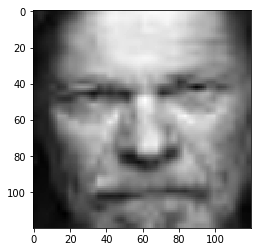

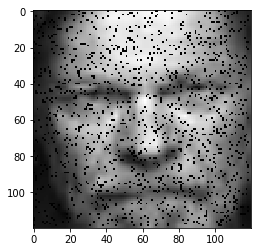

In [7]:
def gauss_noise(image):
      row,col = image.shape
      s_vs_p = 0.5
      amount = 0.1
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
    
#Add noise
noise_img = gauss_noise(resized_array)   

#Display image
plt.imshow(resized_array, cmap="gray")
plt.show()

#Display image
plt.imshow(noise_img, cmap="gray")
plt.show()

In [0]:
#Cascade training set
def haar_cascade():
  
    #For number of emotion categories
    for category in CATEGORIES:
      
        #Get file path to read data
        path = os.path.join(DATADIRRAW, category)
        
        #Get file path to read data
        pathwrite = os.path.join(DATADIRHAAR, category)
        
        #Get value of category array index
        class_num = CATEGORIES.index(category)
        
        #For number of images in category
        for img in os.listdir(path):
            try:
                #Get image from folder
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                
                #Detect face in image
                faces = face_cascade.detectMultiScale(img_array)

                #Extract face from image
                for (x,y,w,h) in faces:
                  img_array = img_array[y:y+h, x:x+w]
                  
                #Write extracted face to folder
                cv2.imwrite(os.path.join(pathwrite,img),img_array)
                
            #pass image if invalid
            except Exception as e:
                pass
#Call function
#haar_cascade()

In [0]:
#Training data vector
training_data = []

#Rotate Left function
def rotate_left(img):
  image_center = tuple(np.array(img.shape[1::-1]) / 2)
  rot_mat_left = cv2.getRotationMatrix2D(image_center, 90, 1.0)
  rotate_left = cv2.warpAffine(img, rot_mat_left, img.shape[1::-1], flags=cv2.INTER_LINEAR)
  return rotate_left
  
#Rotate Right function  
def rotate_right(img):
  image_center = tuple(np.array(img.shape[1::-1]) / 2)
  rot_mat_right = cv2.getRotationMatrix2D(image_center, -90, 1.0)
  rotate_right = cv2.warpAffine(img, rot_mat_right, img.shape[1::-1], flags=cv2.INTER_LINEAR) 
  return rotate_right

#Rotate 180 function
def rotated(img):
  image_center = tuple(np.array(img.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, 180, 1.0)
  rotated = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR) 
  return rotated

#Mirror Function
def mirror(img):
  mirrored_img = np.fliplr(img)
  return mirrored_img

#Flip Function
def flip(img):
  flipped_img = np.flipud(img)
  return flipped_img

#Add noise
def noise(image):
      row,col = image.shape
      s_vs_p = 0.5
      amount = 0.1
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out

#Create training data function
def create_training_data():
  
    #For number of emotion categories
    for category in CATEGORIES:
      
        #Get file path to read data
        path = os.path.join(DATADIR, category)
        
        #Get value of category array index
        class_num = CATEGORIES.index(category)
        
        #For number of images in category
        for img in os.listdir(path):
            try:
                #Get image from folder
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                
                #Augment image
                resized_img = cv2.resize(img_array, (IMGSIZE, IMGSIZE))               
                #rotate_left_img = rotate_left(resized_img)
                #rotate_right_img = rotate_right(resized_img)
                #rotated_img = rotated(resized_img)
                #mirrored_img = mirror(resized_img)
                #flipped_img = flip(resized_array)
                #noisey_img = noise(resized_array)
                
                #Append to training vector
                training_data.append([resized_img, class_num])
                #training_data.append([rotate_left_img, class_num])
                #training_data.append([rotate_right_img, class_num])
                #training_data.append([rotated_img, class_num])
                #training_data.append([mirrored_img, class_num])
                #training_data.append([flipped_img, class_num])
                #training_data.append([noisey_img, class_num])
              
            #pass image if invalid
            except Exception as e:
                pass

#Call function
#create_training_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [0]:
#Shuffle data
random.shuffle(training_data)

In [0]:
#Print length of training data
print(len(training_data))

In [0]:
#print first tren labels
for sample in training_data[:10]:
    print(sample[1])

In [0]:
#Create features and label vectors
X = []
y = []

In [0]:
#Append data to vectors
for features, label in training_data:
    X.append(features)
    y.append(label)

#Reshape features    
X = np.array(X).reshape(-1, IMGSIZE, IMGSIZE, 1)




In [0]:
#Write features
pickle_out = open("/content/drive/My Drive/Emotions/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

#Write labels
pickle_out = open("/content/drive/My Drive/Emotions/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
#Read features
pickle_in = open("/content/drive/My Drive/Emotions/X.pickle", "rb")
X = pickle.load(pickle_in)

#Read labels
pickle_in = open("/content/drive/My Drive/Emotions/y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
#First label
y[0]

In [0]:
#Display first feature array
X[0]

In [0]:
#Display size of each category

print(len(training_data))

anger_counter = 0
disgust_counter = 0
fear_counter = 0
joy_counter = 0
sadness_counter = 0
surprise_counter = 0

for x in range(len(training_data)):
  
  if y[x] == 0:
    anger_counter += 1
    
  if y[x] == 1:
    disgust_counter += 1
    
  if y[x] == 2:
    fear_counter += 1
    
  if y[x] == 3:
    joy_counter += 1
    
  if y[x] == 4:
    sadness_counter += 1
    
  if y[x] == 5:
    surprise_counter += 1
    
print(anger_counter)
print(disgust_counter)
print(fear_counter)
print(joy_counter)
print(sadness_counter)
print(surprise_counter)